In [1]:
# importing
import pandas as  pd
import numpy as np
import re
import string

In [2]:
# Read the CSV file from the raw URL
df = pd.read_csv('https://raw.githubusercontent.com/Toussaintduk/BA_customer_behaviour/main/BA_reviews.csv')
df.head()

,Unnamed: 0,reviews,Stars,date,country
0,0,✅ Trip Verified | British Airways new Club Sui...,5.0,23rd June 2024,(Canada)
1,1,"✅ Trip Verified | Four very pleasant, on time...",5.0,18th June 2024,(United Kingdom)
2,2,Not Verified | We travel extensively over 25...,9.0,18th June 2024,(United Kingdom)
3,3,✅ Trip Verified | Flight delayed an hour due ...,2.0,17th June 2024,(United Kingdom)
4,4,✅ Trip Verified | A very full flight made Pre...,8.0,17th June 2024,(United Kingdom)


In [ ]:
# check the column and rows
df.shape

(7000, 5)

In [ ]:
#  check info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7000 non-null   int64  
 1   reviews     7000 non-null   object 
 2   Stars       6996 non-null   float64
 3   date        7000 non-null   object 
 4   country     6998 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 273.6+ KB


In [ ]:
# check the missed value
df.isnull().sum().max()

4

In [ ]:
# handle missed country data by drop
df = df.dropna()
df.isnull().sum()

Unnamed: 0    0
reviews       0
Stars         0
date          0
country       0
dtype: int64

In [3]:
# delete unnamed column
df = df.drop(columns = ['Unnamed: 0'])
# to check the df
df.head()

,reviews,Stars,date,country
0,✅ Trip Verified | British Airways new Club Sui...,5.0,23rd June 2024,(Canada)
1,"✅ Trip Verified | Four very pleasant, on time...",5.0,18th June 2024,(United Kingdom)
2,Not Verified | We travel extensively over 25...,9.0,18th June 2024,(United Kingdom)
3,✅ Trip Verified | Flight delayed an hour due ...,2.0,17th June 2024,(United Kingdom)
4,✅ Trip Verified | A very full flight made Pre...,8.0,17th June 2024,(United Kingdom)


Rename the stars column as rating

In [4]:
# rename the ratings from Stars
df = df.rename(columns = {'Stars':'rating'})

In [5]:
# verify for df
df.head()

,reviews,rating,date,country
0,✅ Trip Verified | British Airways new Club Sui...,5.0,23rd June 2024,(Canada)
1,"✅ Trip Verified | Four very pleasant, on time...",5.0,18th June 2024,(United Kingdom)
2,Not Verified | We travel extensively over 25...,9.0,18th June 2024,(United Kingdom)
3,✅ Trip Verified | Flight delayed an hour due ...,2.0,17th June 2024,(United Kingdom)
4,✅ Trip Verified | A very full flight made Pre...,8.0,17th June 2024,(United Kingdom)


**checking and handle missed value**

In [6]:
# priting missed value and their percentage
missed_val = df.isnull().sum()
missed_val_perc = df.isnull().mean()*100

for col in df.columns:
    print(f'{col}: {missed_val[col]} ({missed_val_perc[col]:.2f}%)')

reviews: 0 (0.00%)
rating: 4 (0.06%)
date: 0 (0.00%)
country: 2 (0.03%)


Two columns in the dataset contain missing values. Given the low percentage of missing data, imputing the values may not be efficient. Therefore, we can opt to drop these columns to maintain the dataset's integrity and quality.

In [7]:
# drop nan values
df = df.dropna()

# check for the missed value
if df.isnull().sum().any()>0:
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


In [8]:
# extract the column of verified
df['Verified'] = df['reviews'].str.contains('Trip Verified')

In [9]:
df['country'].unique()

array([' (Canada) ', ' (United Kingdom) ', ' (United States) ',
       ' (Austria) ', ' (South Africa) ', ' (Italy) ', ' (Denmark) ',
       ' (Singapore) ', ' (Netherlands) ', ' (Belgium) ', ' (Australia) ',
       ' (Nigeria) ', ' (Japan) ', ' (Ukraine) ', ' (Germany) ',
       ' (Ireland) ', ' (Spain) ', ' (China) ', ' (Ecuador) ',
       ' (Switzerland) ', ' (Romania) ', ' (France) ', ' (Kuwait) ',
       ' (Iceland) ', ' (Poland) ', ' (Hong Kong) ', ' (Qatar) ',
       ' (Greece) ', ' (Senegal) ', ' (United Arab Emirates) ',
       ' (Cyprus) ', ' (Chile) ', ' (Sweden) ', ' (India) ',
       ' (New Zealand) ', ' (Czech Republic) ', ' (Malaysia) ',
       ' (Ghana) ', ' (Bermuda) ', ' (Botswana) ', ' (Brazil) ',
       ' (Panama) ', ' (Russian Federation) ', ' (Philippines) ',
       ' (Bulgaria) ', ' (Thailand) ', ' (Argentina) ', ' (Mexico) ',
       ' (Saint Kitts and Nevis) ', ' (Vietnam) ', ' (Norway) ',
       ' (Jordan) ', ' (Taiwan) ', ' (Slovakia) ', ' (Israel) ',
       '

Cleaning the country column

In [10]:
# remove the bracket in country column
df['country'] = df['country'].str.replace('(','')
df['country'] = df['country'].str.replace(')','')
# Clean the 'country' column by stripping leading and trailing whitespace
df['country'] = df['country'].str.strip()
df = df[df['country'].str.strip() != '']

In [11]:
df['country']

0               Canada
1       United Kingdom
2       United Kingdom
3       United Kingdom
4       United Kingdom
             ...      
6995     United States
6996         Australia
6997    United Kingdom
6998    United Kingdom
6999    United Kingdom
Name: country, Length: 6992, dtype: object

cleaning the Rating column

In [12]:
df['rating'].unique()

array([ 5.,  9.,  2.,  8.,  7.,  1.,  3.,  4.,  6., 10.])

In [13]:
# convert into integer type
df['rating'] = df['rating'].astype('int64')

##### Cleaning reviews

In [14]:
df['reviews']

0       ✅ Trip Verified | British Airways new Club Sui...
1       ✅ Trip Verified |  Four very pleasant, on time...
2       Not Verified |   We travel extensively over 25...
3       ✅ Trip Verified |  Flight delayed an hour due ...
4       ✅ Trip Verified |  A very full flight made Pre...
                              ...                        
6995    Just took British from London to Seattle. Tire...
6996    Travelled from SYD to London return. Poor serv...
6997    VIE to LHR - Seats were of the new configurati...
6998    LGW to SZG. Absolutely useless for a scheduled...
6999    BA92 4/10/14 YYZ-LHR B787 G-ZBJE. If you want ...
Name: reviews, Length: 6992, dtype: object

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [18]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
# Define the clean_text function
def clean_text(text):
    # Remove "✅ Trip Verified", "Not Verified" and "|"
    text = text.replace('✅ Trip Verified', '')
    text = text.replace('Not Verified', '')
    text = text.replace('|', '')

    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove digits

    # Tokenize the text
    words = text.split()

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Remove stopwords and lemmatize the words
    cleaned_text = ' '.join(lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english'))

    return cleaned_text.strip()

In [19]:
# Apply the clean_text function to the 'reviews' column
df['cleaned_reviews'] = df['reviews'].apply(clean_text)
df['cleaned_reviews']

0       british airway new club suite marked improveme...
1       four pleasant time flight friendly helpful sta...
2       travel extensively year tend use ba regular tr...
3       flight delayed hour due bad weather around jfk...
4       full flight made premium economy feel little l...
                              ...                        
6995    took british london seattle tired airplane fle...
6996    travelled syd london return poor service board...
6997    vie lhr seat new configuration inch club econo...
6998    lgw szg absolutely useless scheduled service w...
6999    ba yyzlhr b gzbje want know ryanair long haul ...
Name: cleaned_reviews, Length: 6992, dtype: object

Cleaning the date

In [20]:
df['date'].head()

0    23rd June 2024
1    18th June 2024
2    18th June 2024
3    17th June 2024
4    17th June 2024
Name: date, dtype: object

In [21]:
# chnaging the date format
# Function to remove ordinal suffixes
def remove_ordinal_suffix(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

# Apply the function to the 'date' column
df['date'] = df['date'].apply(remove_ordinal_suffix)

# Convert the cleaned date strings to datetime objects
df['date'] = pd.to_datetime(df['date'], format='%d %B %Y')

# Display the resulting dataframe
df['date'].head()

0   2024-06-23
1   2024-06-18
2   2024-06-18
3   2024-06-17
4   2024-06-17
Name: date, dtype: datetime64[ns]

In [22]:
# display cleaned data
df.head()

,reviews,rating,date,country,Verified,cleaned_reviews
0,✅ Trip Verified | British Airways new Club Sui...,5,2024-06-23,Canada,True,british airway new club suite marked improveme...
1,"✅ Trip Verified | Four very pleasant, on time...",5,2024-06-18,United Kingdom,True,four pleasant time flight friendly helpful sta...
2,Not Verified | We travel extensively over 25...,9,2024-06-18,United Kingdom,False,travel extensively year tend use ba regular tr...
3,✅ Trip Verified | Flight delayed an hour due ...,2,2024-06-17,United Kingdom,True,flight delayed hour due bad weather around jfk...
4,✅ Trip Verified | A very full flight made Pre...,8,2024-06-17,United Kingdom,True,full flight made premium economy feel little l...


### Explatory Data Analysis (EDA)

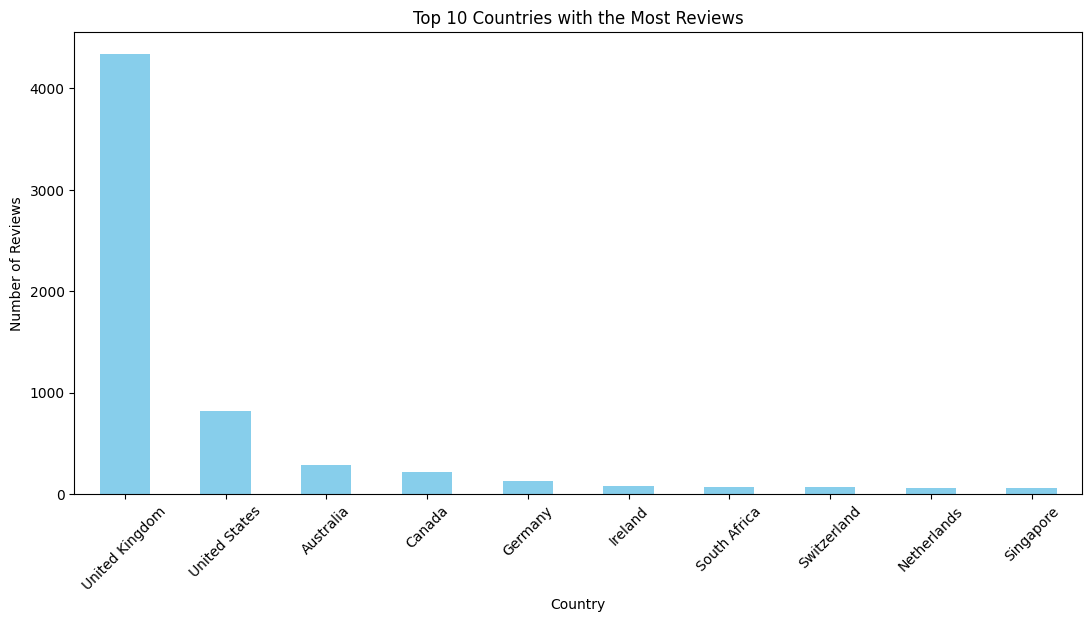

In [25]:
import matplotlib.pyplot as plt
# which country that has most reviews
top_countries = df['country'].value_counts().head(10)

# visualize the data
plt.figure(figsize=(13, 6))
top_countries.plot(kind ='bar',color='skyblue')
plt.title('Top 10 Countries with the Most Reviews')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

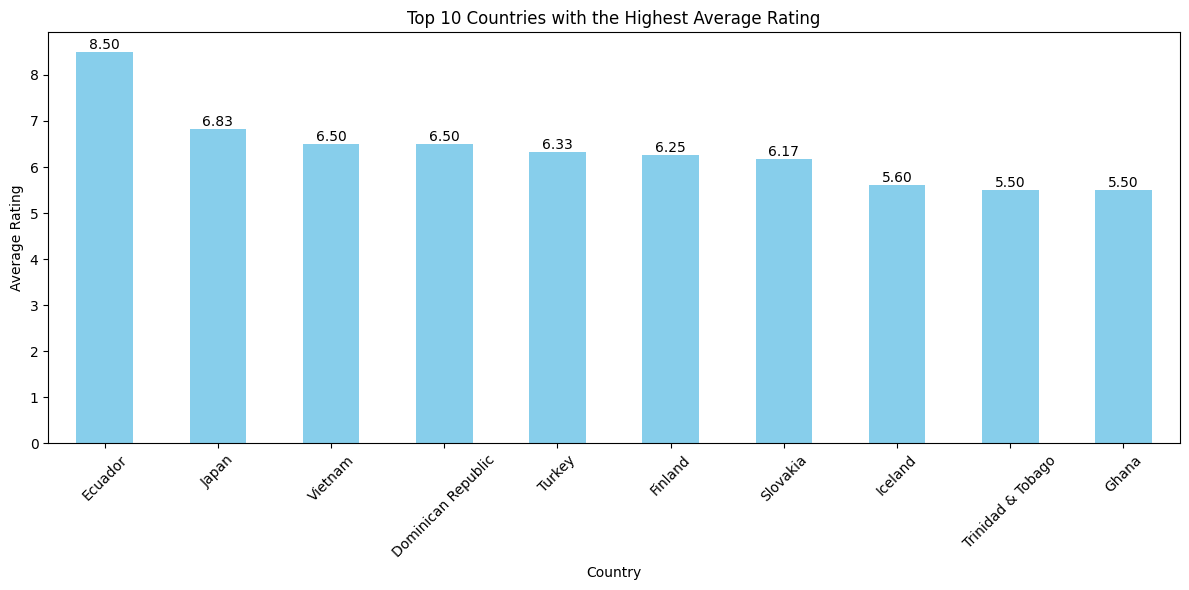

In [ ]:
# Calculate the mean rating for each country and get the top 10 countries
top_countries_by_rating = df.groupby('country')['rating'].mean().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
ax = top_countries_by_rating.plot(kind='bar', color='skyblue')

# Annotate each bar with its rating value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Countries with the Highest Average Rating')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ecuador has the highest number of reviews and the highest average rating of 8.50 which shows that Many people people from ECuador reely enjoy the BA Airlines Services

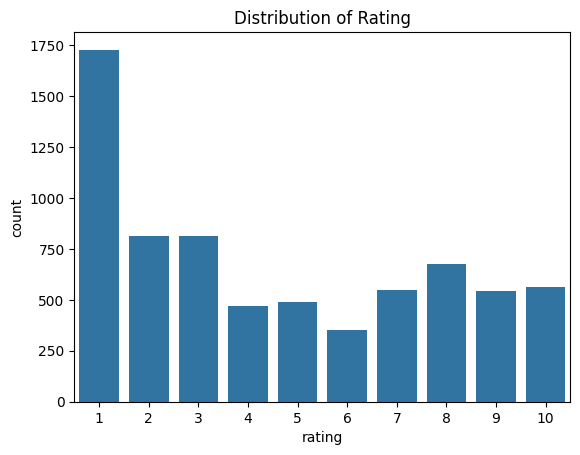

In [26]:
import seaborn as sns
# visualization of distribution rating
sns.countplot(x='rating',data=df)
plt.title('Distribution of Rating')
plt.show()

In [37]:
# Calculate the percentage of verified trips
percentage_verified = (len(df[df['Verified'] == True]) / len(df)) * 100

# Calculate the percentage of canceled trips
percentage_canceled = (len(df[df['Verified'] == False]) / len(df)) * 100
print(df['Verified'].value_counts())
print(f"Percentage of Verified Trips: {percentage_verified:.2f}%")
print(f"Percentage of Canceled Trips: {percentage_canceled:.2f}%")


Verified
False    4436
True     2556
Name: count, dtype: int64
Percentage of Verified Trips: 36.56%
Percentage of Canceled Trips: 63.44%


Above analysis reveals a significant issue with British Airlines has  higher proportion of trips are canceled compared to Verified trip , which correlates with the low ratings received by customers. as the above Distribution of Rating most rating is 1

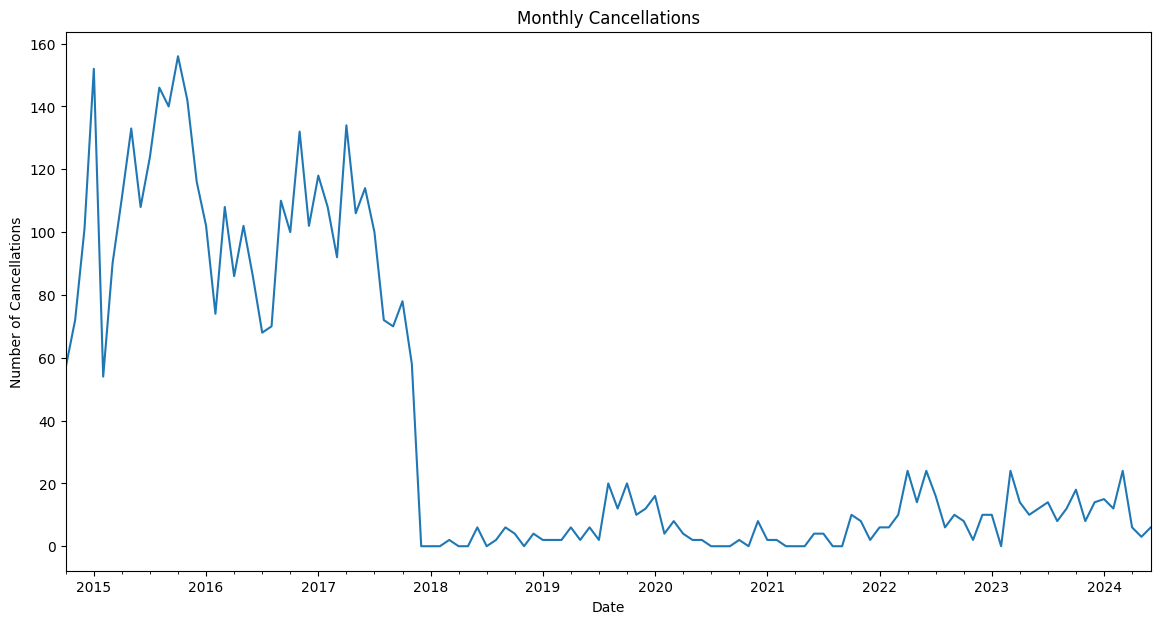

In [40]:
#  Trend Analysis
# Assuming 'Date' column exists in your dataframe
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime if not already
df.set_index('date', inplace=True)

# Plot cancellations over time
plt.figure(figsize=(14, 7))
df.resample('M')['Verified'].apply(lambda x: (x == False).sum()).plot()
plt.title('Monthly Cancellations')
plt.xlabel('Date')
plt.ylabel('Number of Cancellations')
plt.show()

Above trend analysis indicates a positive development for British Airlines. Recent data shows a noticeable decrease in the rate of trip cancellations, suggesting that the airline is actively working to improve its operational reliability. This improvement is a clear demonstration of British Airlines' commitment to maintaining a low rate of canceled trips, particularly when compared to previous years.

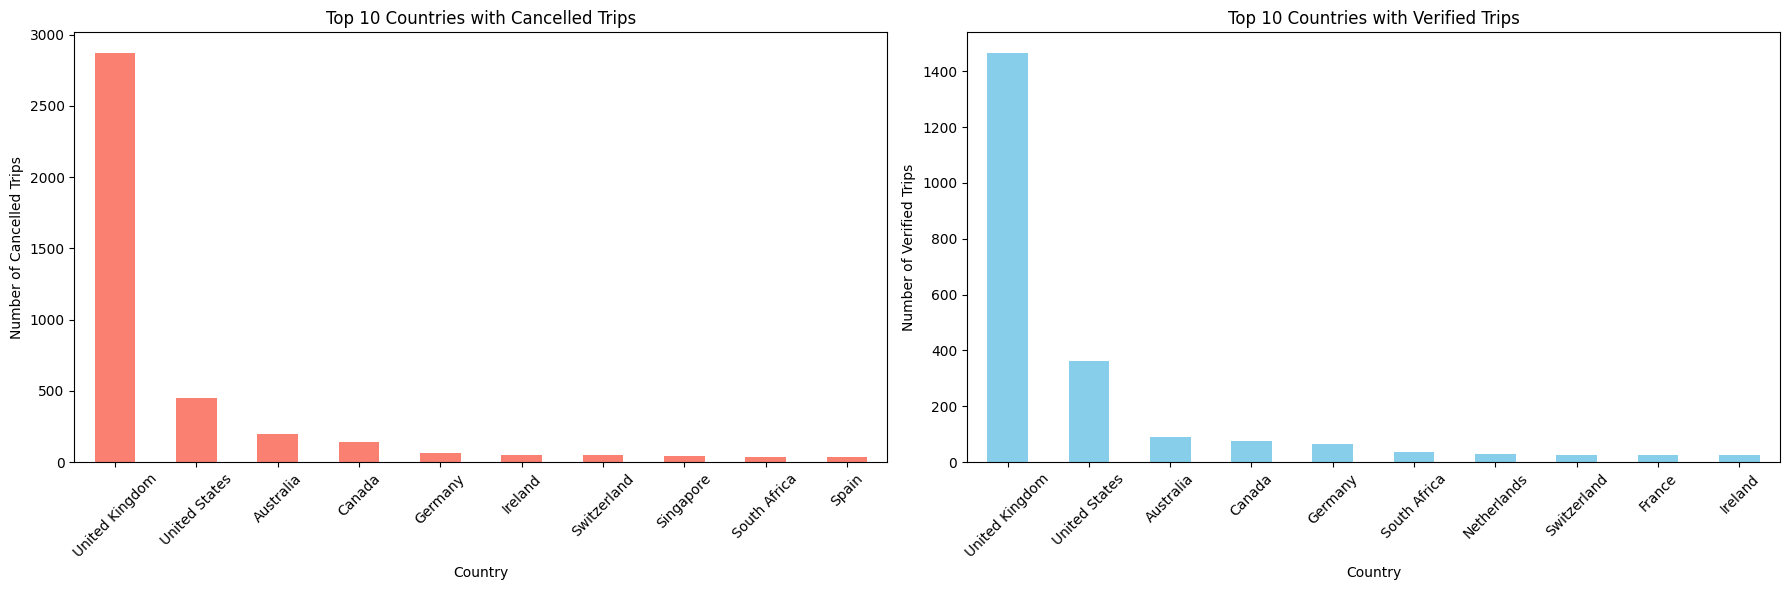

In [ ]:
# Assuming 'Cancelled' and 'Verified' columns exist with boolean values, count cancellations and verifications by country
cancelled_counts = df[df['Verified'] == False]['country'].value_counts().head(10)
verified_counts = df[df['Verified'] == True]['country'].value_counts().head(10)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot for cancelled trips
cancelled_counts.plot(kind='bar', color='salmon', ax=ax1)
ax1.set_title('Top 10 Countries with Cancelled Trips')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Cancelled Trips')
ax1.tick_params(axis='x', rotation=45)

# Plot for verified trips
verified_counts.plot(kind='bar', color='skyblue', ax=ax2)
ax2.set_title('Top 10 Countries with Verified Trips')
ax2.set_xlabel('Country')
ax2.set_ylabel('Number of Verified Trips')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

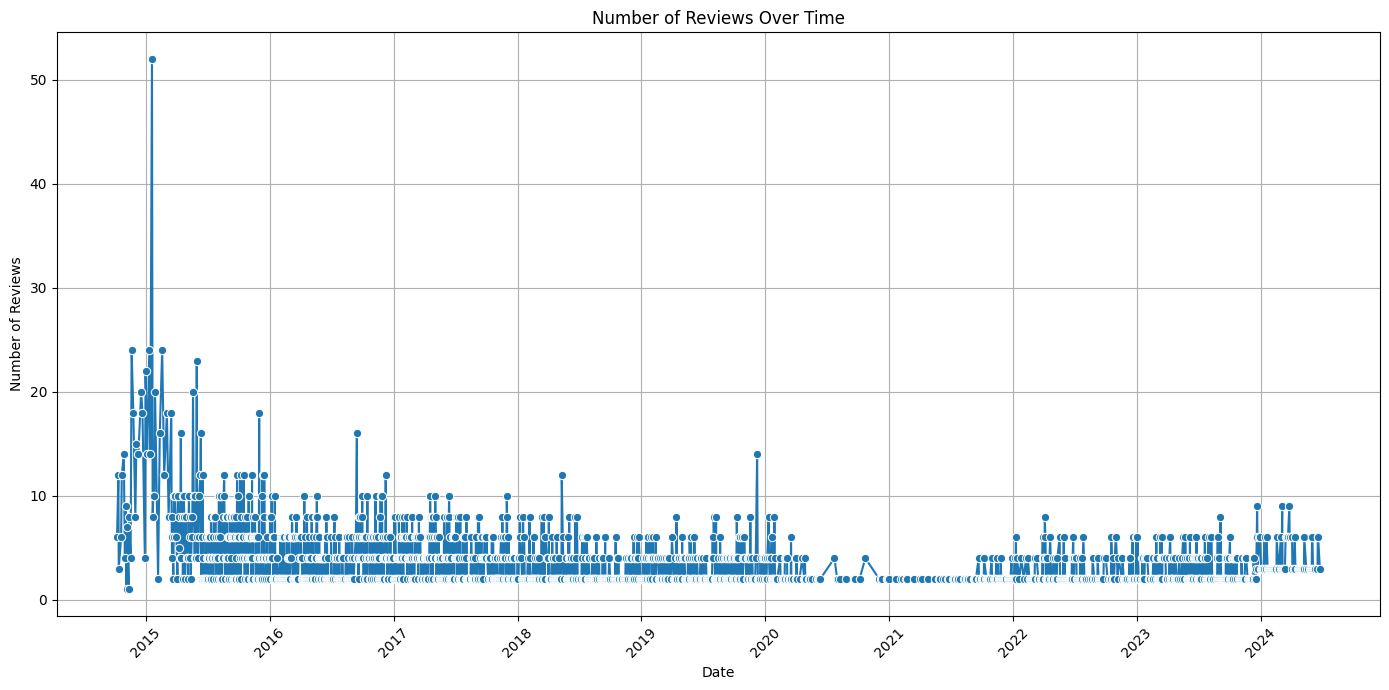

In [ ]:
# Group by date and count reviews
reviews_by_date = df.groupby('date')['reviews'].count().reset_index()

# Plotting using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='reviews', data=reviews_by_date, marker='o')

# Formatting
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()  # Ensures tight layout to prevent overlapping labels
plt.show()

 British Airlines reveals a significant pattern in the number of reviews over recent years. The data shows a decline in reviews starting from 2019, followed by a rise beginning in 2022. This trend is likely influenced by the global COVID-19 pandemic

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

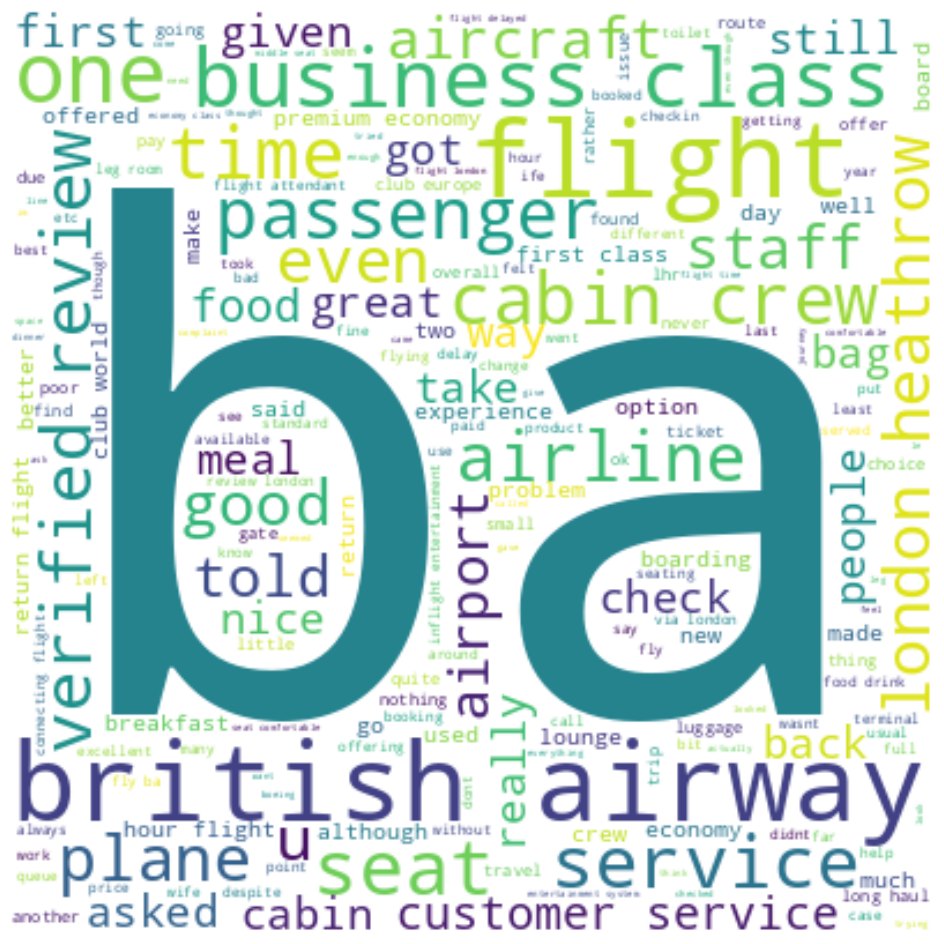

In [ ]:
# Join all reviews into a single string
text = ' '.join(df['cleaned_reviews'])


# Generate the word cloud
wd = WordCloud(height=400, width=400, max_font_size=300, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(17, 12))
plt.imshow(wd, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

there is some word such as 'ba', 'airlines' ,'british' that will not contribute to know whether it is positive or negative  to analysis
we can use stopwords to remove it

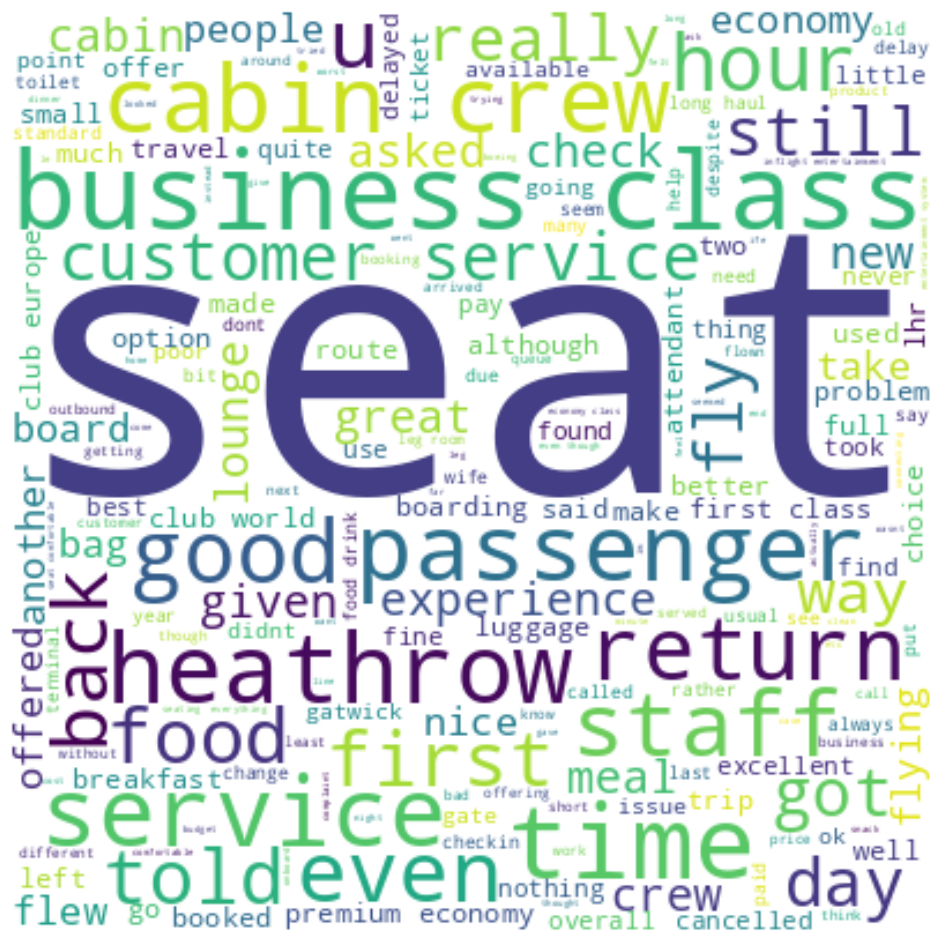

In [42]:
# Join all reviews into a single string
text = ' '.join(df['cleaned_reviews'])

# Set up stopwords
stopwords = set(STOPWORDS)
stopwords.update(['ba', 'flight', 'verified','review','british','Airway','London','airline','aircraft','one','airport','plane'])

# Generate the word cloud
wd = WordCloud(height=400, width=400, max_font_size=300, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(17, 12))
plt.imshow(wd, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

there is word that appeared most such seat ,cabin,crew,passenger,business class,staff,return

##### Word Frequency

In [ ]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams

# Custom stopwords for word that contribute to analysis
custom_stopwords = set(['ba', 'would', 'flight', 'verified', 'review', 'british','u','airway', 'london', 'airline', 'aircraft', 'one', 'airport', 'plane'])

# Merge custom stopwords with NLTK English stopwords
merged_stopwords = custom_stopwords.union(set(stopwords.words('english')))


# Split the cleaned reviews into list of words
words = df['cleaned_reviews'].str.split()

# Flatten the list of words
all_words = [word for sublist in words for word in sublist if word.lower() not in merged_stopwords]

# Perform the most common words analysis
most_common_words = FreqDist(all_words).most_common(20)

# Display the most common words
print("Most common words ")
most_common_words


Most common words 


[('seat', 8409),
 ('service', 5706),
 ('time', 4618),
 ('food', 4264),
 ('crew', 4143),
 ('cabin', 3850),
 ('good', 3794),
 ('class', 3776),
 ('hour', 3679),
 ('business', 3121),
 ('staff', 2958),
 ('heathrow', 2954),
 ('economy', 2684),
 ('get', 2644),
 ('passenger', 2540),
 ('first', 2467),
 ('drink', 2249),
 ('meal', 2223),
 ('back', 2086),
 ('return', 2058)]

<ipython-input-144-5ad23a9ff6be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=common_words_df, palette='viridis')


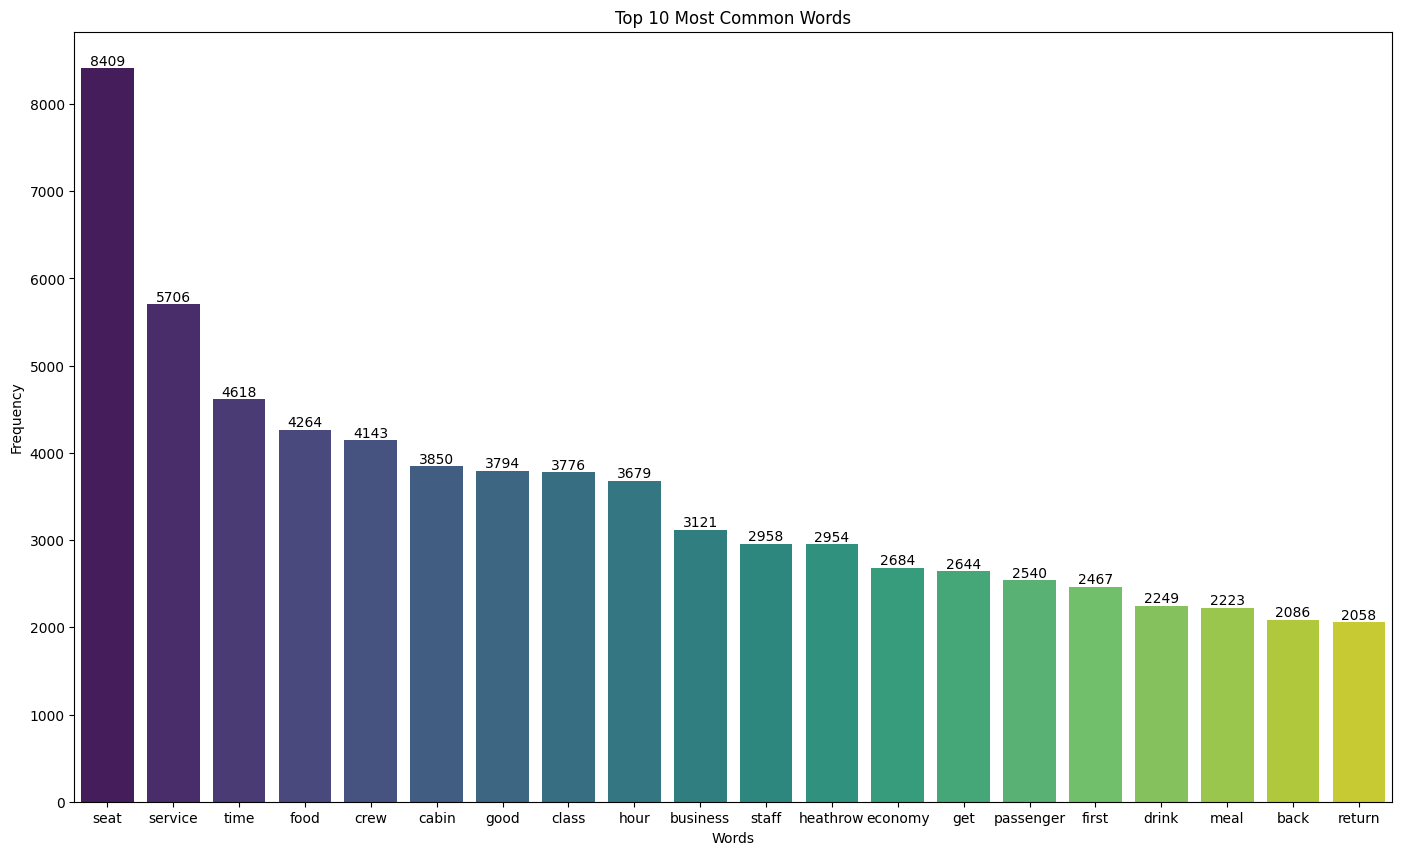

In [ ]:
# Convert to DataFrame for Seaborn plotting
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plotting using Seaborn
plt.figure(figsize=(17, 10))
sns.barplot(x='Word', y='Frequency', data=common_words_df, palette='viridis')

# Annotate each bar with its frequency
for index, row in common_words_df.iterrows():
    plt.text(index, row['Frequency'] + 0.2, row['Frequency'], ha='center', va='bottom', fontsize=10)

plt.xlabel('Words')
plt.title('Top 10 Most Common Words')
plt.show()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer


# Define the ngram  range
ngram_range =(4,4)

# define the stopwords
custom_stopwords = ['ba', 'would', 'flight', 'verified', 'review', 'british', 'u', 'airway',
    'london', 'airline', 'aircraft', 'one', 'airport', 'plane']


# initialize the vectorizer
vect = CountVectorizer(ngram_range = ngram_range, stop_words = custom_stopwords)

# fit and transform cleaned_description
X = vect.fit_transform(df['cleaned_reviews'])

# convert the result result to df
ngram_frequencies = pd.DataFrame(X.toarray(),columns = vect.get_feature_names_out())

# Sum the frequencies of each ngram accross all document

ngram_frequencies = ngram_frequencies.sum().reset_index()
ngram_frequencies.columns = ['ngram','frequency']
ngram_frequencies = ngram_frequencies.sort_values(by = 'frequency', ascending = False).reset_index(drop=True)

# display the ngram frequencies
ngram_frequencies.head(20)

,ngram,frequency
0,world traveller plus premium,20
1,heathrow new york jfk,20
2,cabin crew friendly attentive,18
3,traveller plus premium economy,18
4,new york jfk heathrow,16
5,business class club world,16
6,extra leg room seat,14
7,business class seat economy,14
8,new club world suite,13
9,club europe business class,12


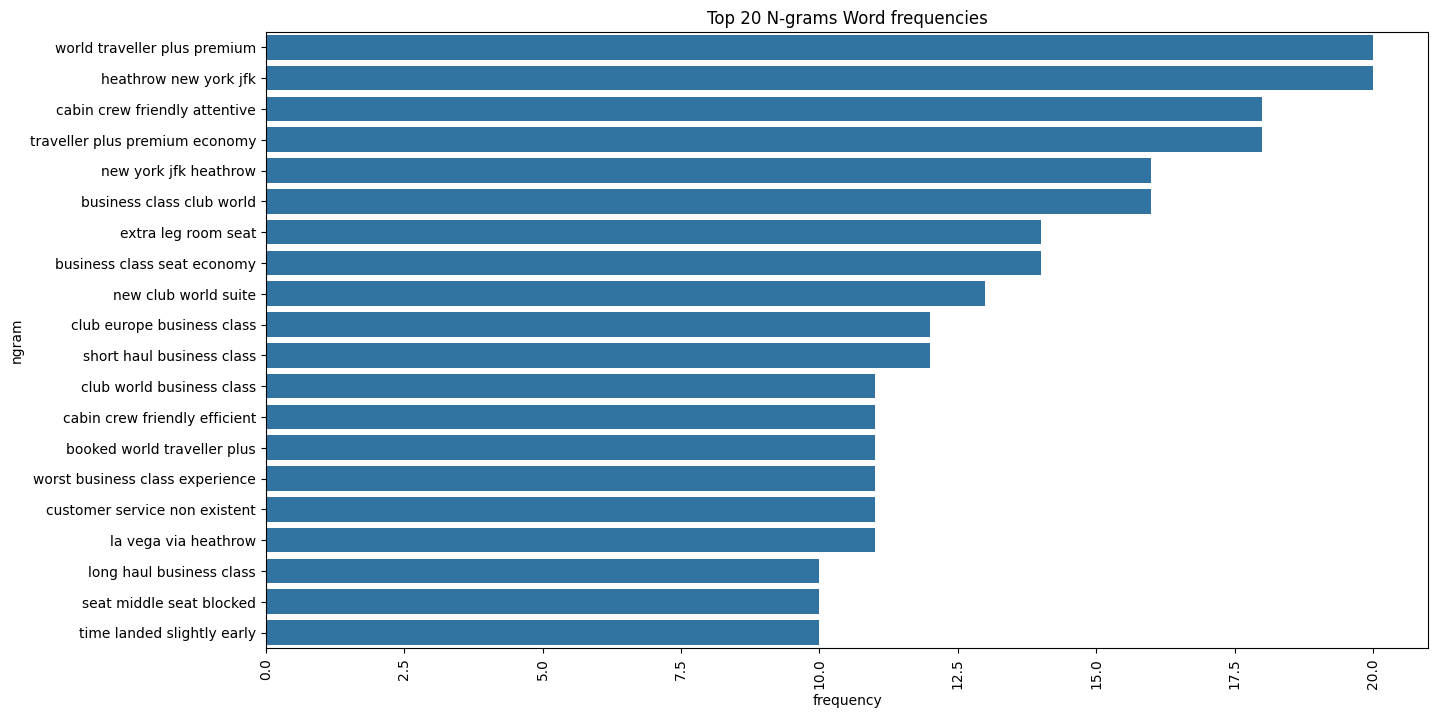

In [ ]:
import seaborn as sns
# visualize the n_gram frequencies
plt.figure(figsize =(15,8))
sns.barplot(y='ngram',x ='frequency',data = ngram_frequencies.head(20),orient='h')
plt.title('Top 20 N-grams Word frequencies')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# download vader lexicon
nltk.download('vader_lexicon')


# initialize the Vader sentiment

sid = SentimentIntensityAnalyzer()

# apply sentiment analysis to each review
def get_sentiment(review):
  score = sid.polarity_scores(review)['compound']
  return 'positive' if score >= 0.05 else 'negative' if score<=-0.05 else 'neutral'

# apply the Function to the cleaned_reviews
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# analyzing of sentiment avalailable in df
df['sentiment'].value_counts()

sentiment
positive    4458
negative    2404
neutral      130
Name: count, dtype: int64

In [ ]:
# Calculate the percentage of Positive sentiment
percentage_Positive= (len(df[df['sentiment'] == 'positive']) / len(df)) * 100

# Calculate the percentage of Negative sentiment
percentage_Negative = (len(df[df['sentiment'] == 'negative']) / len(df)) * 100

# Calculate the percentage of Neutral sentiment
percentage_Neutral = (len(df[df['sentiment'] == 'neutral']) / len(df)) * 100


print(df['sentiment'].value_counts())
print(f"Percentage of Positive : {percentage_Positive:.2f}%")
print(f"Percentage of Negative : {percentage_Negative:.2f}%")
print(f"Percentage of Neutral : {percentage_Neutral:.2f}%")


### Topic Modeling with Latent Dirichlet allocation(LDA)

LDA is a topic modeling technique for uncovering the central topics and their distributions across a set of documents. Latent Dirichlet allocation (LDA)—not to be confused with linear discriminant analysis in machine learning—is a Bayesian approach to topic modeling

In [ ]:
# install necessary packages of modelling
!pip install gensim nltk


In [ ]:
import  gensim
from gensim import corpora


In [ ]:
# Tokenize the reviews
df['tokenized_reviews'] = df['cleaned_reviews'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokenized_reviews'] = df['tokenized_reviews'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['tokenized_reviews'])

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=1, no_above=0.5)

# Create a corpus from the dictionary and tokenized reviews
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokenized_reviews']]


In [ ]:
# Set the number of topics
num_topics = 3

# Train the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.013*"british" + 0.013*"airway" + 0.012*"airline" + 0.011*"service"')
(1, '0.012*"hour" + 0.011*"time" + 0.008*"crew" + 0.008*"airway"')
(2, '0.015*"good" + 0.013*"food" + 0.012*"crew" + 0.012*"service"')


In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [46]:
# download vader_lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True